# Big-O Notation Overview

## Math Review

+ Before we can discuss Big-O notation and algorithmic complexity, we must review a few key math topics.

### Functions

+ A **function** is something that takes and input and produces and output.
+ A **function** is traditionally written as $f(x)$.
+ For example, the function $f(x) = x + 5$ is a function that takes in some value for $x$ and adds $5$ to it.
+ We can see some examples of plugging in numbers to our function below

    $
    \begin{aligned}
    f(x) &= x + 5 \\
    f(10) &= 10 + 5 = 15 \\
    f(4) &= 4 + 5 = 9 \\
    f(-4) &= -4 + 5 = 1
    \end{aligned}
    $

### Graphing functions

+ We can graph the inputs and outputs of functions on the **Cartesian Plane**.
+ The **Cartesian Plane** is the standard 2-dimensional coordinate plane that you may be familiar with from high school mathematics.
+ The **Cartesian Plane** consists of a **horizontal x-axis** and a **vertical y-axis**.

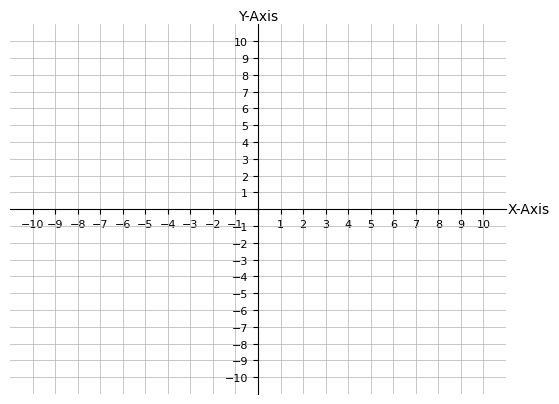

In [15]:
from typing import Literal
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

from labellines import labelLine, labelLines

def get_cartesian_plane(min_val: int = -10, max_val: int = 10) -> tuple[Figure, Axes]:
    fig, ax = plt.subplots()

    range_vals = range(min_val, max_val + 1 if max_val >= 0 else max_val - 1)

    ax.set_xticks(range_vals)
    ax.set_yticks(range_vals)
    ax.tick_params(zorder=100, labelsize=8)

    ax.spines.left.set_position("zero")
    ax.spines.bottom.set_position("zero")
    ax.spines[['right', 'top']].set_visible(False)

    ax.grid(True, linewidth=0.5)

    x_axis_label_loc = range_vals[-1] + 2 if max_val >= 0 else range_vals[-1] - 2
    y_axis_label_loc = range_vals[-1] + 1.5 if max_val >= 0 else range_vals[-1] - 1.5
    ax.annotate("X-Axis", [range_vals[-1], 0], xytext=[x_axis_label_loc, 0], ha='center', va='center')
    ax.annotate("Y-Axis", [0, range_vals[-1]], xytext=[0, y_axis_label_loc], ha='center', va='center')

    ax.set_ylim(bottom=range_vals[0]-1, top=range_vals[-1]+1)
    ax.set_xlim(left=range_vals[0]-1, right=range_vals[-1]+1)

    if 0 in range_vals:
        idx = range_vals.index(0)
        ax.xaxis.get_major_ticks()[idx].label1.set_visible(False)
        ax.yaxis.get_major_ticks()[idx].label1.set_visible(False)

    return fig, ax

def plot_point(x: float, y: float, ax: Axes, label_pos: Literal["top", "left", "bottom", "right"] = "top") -> None:
    ax.add_line(Line2D([x, x], [0, y], color="red", linestyle="--", linewidth=1))
    ax.add_line(Line2D([0, x], [y, y], color="red", linestyle="--", linewidth=1))
    ax.plot(x, y, "o", color=(0, 0, 0), markersize=4)
    
    match label_pos:
        case "top":
            pos = [x, y+0.5]
        case "bottom":
            pos = [x, y-0.5]
        case "left":
            pos = [x-1, y]
        case "right":
            pos = [x+1, y]

    ax.annotate(f"({x}, {y})", [x, y], pos, ha="center", va="center", color=(0, 0, 0), fontsize=9)

fig, ax = get_cartesian_plane()

plt.show()


+ We can plot points on this plane based on some given x and y value, usually presented in the form $(x, y)$.
+ For example, in the following graph we plot the point $(3, 5)$ on the **cartesian plane** by finding the value $3$ on the **x-axis** and $5$ on the **y-axis**, and plotting a point where the two values meet.

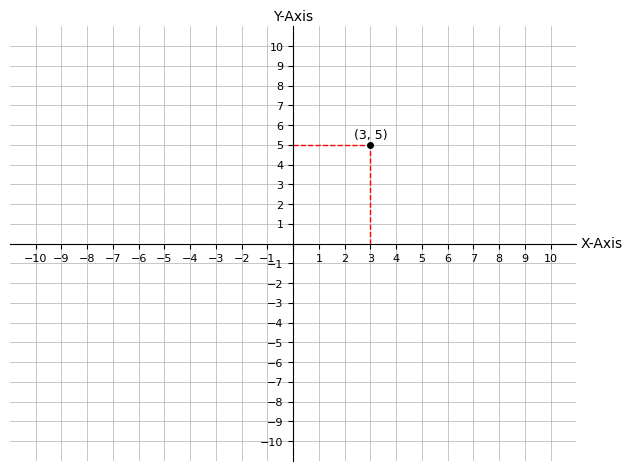

In [16]:
fig, ax = get_cartesian_plane()

plot_point(3, 5, ax)

plt.tight_layout()
plt.show()

+ Let's plot a few more points just to nail the *point* home

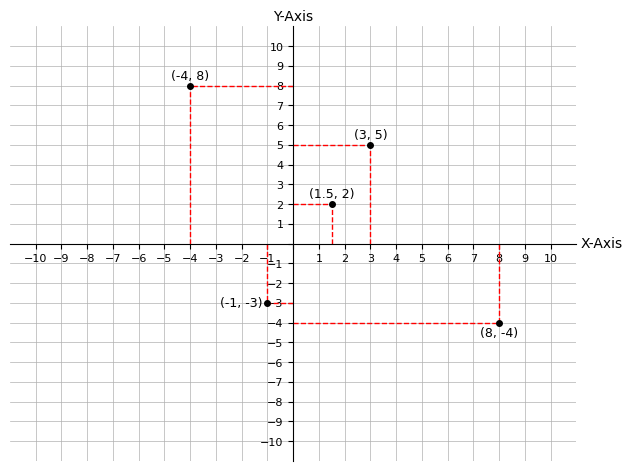

In [17]:
fig, ax = get_cartesian_plane()

plot_point(3, 5, ax)
plot_point(1.5, 2, ax)
plot_point(-1, -3, ax, "left")
plot_point(-4, 8, ax)
plot_point(8, -4, ax, "bottom")

plt.tight_layout()
plt.show()

+ Now that we know how to plot points, we can bring this together with our discussion on functions, to graph functions.
+ Let's take our funciton from earlier $f(x) = x + 5$.
+ To graph this function, we first select some range of values. We then plug those values into $x$ and treat the value that is returned from our funciton as $y$.
+ Let's start by using a range of values $1$ through $5$ for x and mark the result for each:

|$x$|$f(x) = y = x + 5$|
|---|------------------|
|0|5|
|1|6|
|2|7|
|3|8|
|4|9|
|5|10|

+ Now we can plot these values on the **cartesian plane**

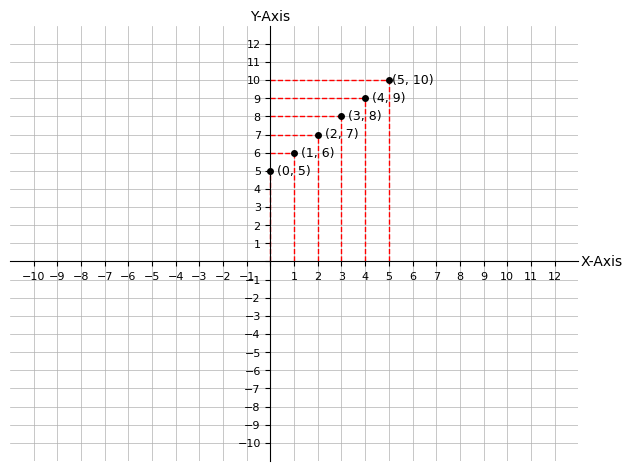

In [19]:
fig, ax = get_cartesian_plane(max_val=12)

for i in range(6):
    plot_point(i, i+5, ax, "right")

plt.tight_layout()
plt.show()

+ Now, to plot the general shape of the function, we can draw a line through our points. 

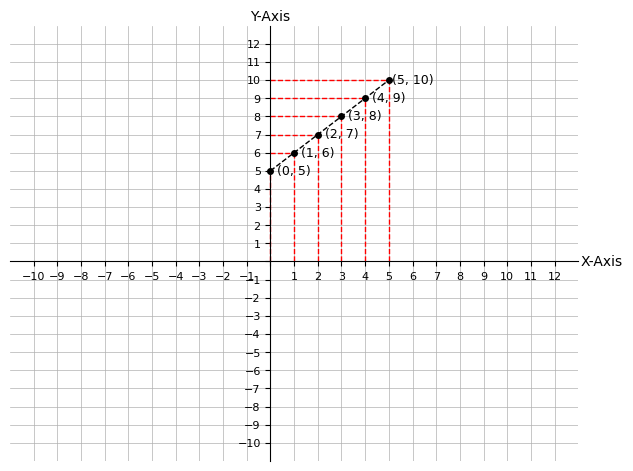

In [23]:
fig, ax = get_cartesian_plane(max_val=12)

for i in range(6):
    plot_point(i, i+5, ax, "right")

ax.add_line(Line2D(range(6), [i+5 for i in range(6)], color=(0, 0, 0), linestyle="--", linewidth=1))

plt.tight_layout()
plt.show()

+ Most of the time, when we graph a function, we have a computer graph a very large number of points (usually more than 5) so we can be more confident in the shape of the function. In this case, we don't usually show the actual dots that we plot.
+ Therefore, we can say the graph of our function $f(x) = x + 5$ looks like this.

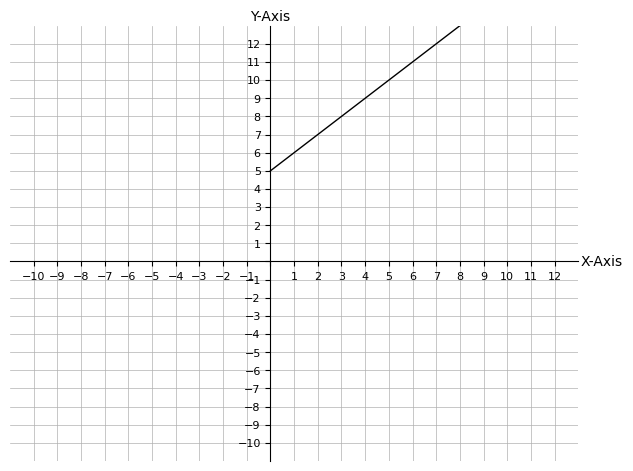

In [26]:
fig, ax = get_cartesian_plane(max_val=12)

ax.add_line(Line2D(range(13), [i+5 for i in range(13)], color=(0, 0, 0), linewidth=1))

plt.tight_layout()
plt.show()

+ Using this same technique, we can graph all sorts of functions!

/Users/gla9931/.pyenv/versions/3.11.3/envs/dsa-studying/lib/python3.11/site-packages/labellines/core.py:208: UserWarning: The value at position 3 in `xvals` is outside the range of its associated line (xmin=0.0, xmax=25.0, xval=-2.490000000000001). Clipping it into the allowed range.
  warnings.warn(


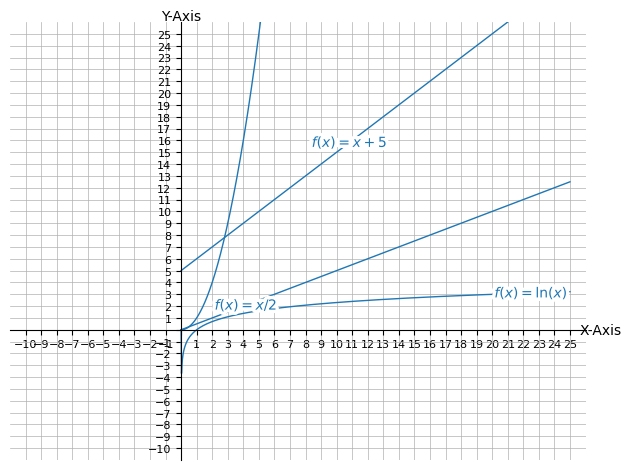

In [61]:
from math import log


fig, ax = get_cartesian_plane(max_val=25)

x = np.linspace(0, 25, 1000)
ax.add_line(Line2D(x, [i**2 for i in x], linewidth=1, label="$f(x) = x^2$"))
ax.add_line(Line2D(x, [i+5 for i in x], linewidth=1, label="$f(x) = x + 5$"))
ax.add_line(Line2D(x, [i/2 for i in x], linewidth=1, label="$f(x) = x / 2$"))
ax.add_line(Line2D(x, [log(i) if i != 0 else 0 for i in x], linewidth=1, label="$f(x) = \ln(x)$"))

labelLines(ax.get_lines(), align=False, fontsize=10)

plt.tight_layout()
plt.show()

# Big-O Notation

## What is Big-O?

+ Big-O notation measures the worst case time complexity of an algorithm
+ Why not just use the actual runtime of the algorithm to measure performance?
  + The actual running time of an algorithm (e.g. 10 seconds or 30 minutes) can vary based on a variety of factors, such as the computer hardware that the algorithm is running on or the programming language being used.
+ Instead, we use a method called **Big-O** to express the runtime of an algorithm in terms of how quickly the runtime grows relative to the input as the input gets arbitrarily large.
+ In **Big-O** notation, we use the size of the input, which we call $n$ to compare a function. As $n$ grows larger, we want to see how the runtime of the program changes.
+ We can view this notation on a graph. For example, the below graphs show $O(1)$ and $O(n)$ respectively.

+ 
+ In **Big-O** notation we don't care about constants, that is, we don't care about  any value that does not scale with the size of the input
  + e.g. 10, 2, 105 are all constants
+ 

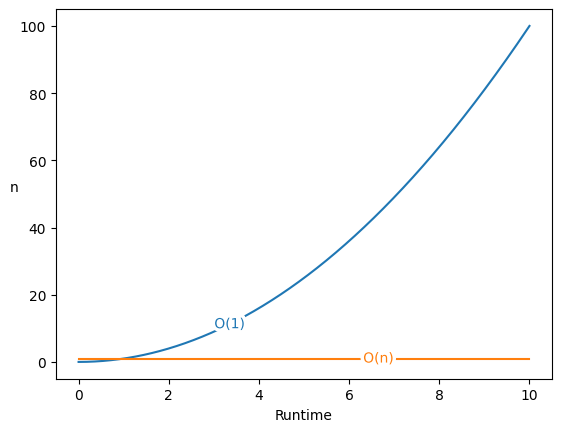

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from labellines import labelLine, labelLines

fig, ax1 = plt.subplots()

x = np.linspace(0, 10, 1000)
y = [1 for _ in x]

ax1.plot(x, x**2, label="O(1)")
ax1.plot(x, y, label="O(n)")

ax1.set_xlabel("Runtime")
ax1.set_ylabel("n", rotation=0)

labelLines(ax1.get_lines(), align=False, fontsize=10)

plt.show()